<a href="https://colab.research.google.com/github/cshruti07/CV/blob/main/Ethnicity75accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

2.15.0


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"cs0109shrutimishra","key":"94fab05f6bb90a37b4367b8938d700f9"}'}

In [ ]:
! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv'
od.download('https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv')

Skipping, found downloaded files in "./age-gender-and-ethnicity-face-data-csv" (use force=True to force download)


In [ ]:
df = pd.read_csv('/content/age-gender-and-ethnicity-face-data-csv/age_gender.csv')

df.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


In [ ]:
df[df.isnull().any(axis=1)]

,age,ethnicity,gender,img_name,pixels


In [ ]:
df.shape


(23705, 5)

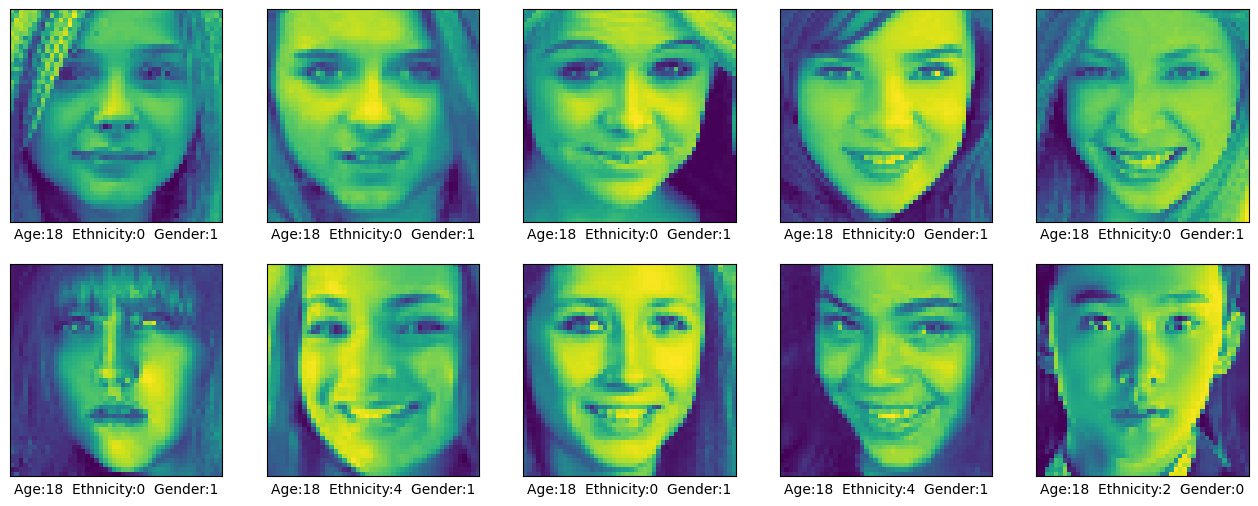

In [ ]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

plt.figure(figsize=(16,16))
for i in range(2500,2510):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[i])+
        "  Gender:"+ str(df['gender'].iloc[i])
    )
plt.show()

In [ ]:
df.drop('img_name', axis = 1, inplace=True)

In [ ]:
X = df.pixels
y_gender = df.gender
y_age = df.age
y_ethnicity = df.ethnicity

In [ ]:
X = np.stack(np.array(X), axis=0)

In [ ]:
pictures = np.reshape(X, (-1, 48, 48, 1))

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:

X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(pictures, y_ethnicity, test_size=0.2, random_state=1)

X_train_ethnicity, X_val_ethnicity, y_train_ethnicity, y_val_ethnicity = train_test_split(X_train_ethnicity, y_train_ethnicity, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    brightness_range=[0.8,1.2],
    zoom_range=0.2,
    shear_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
# Model for Ethnicity

ethnicity_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(8, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax'),
])
ethnicity_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ethnicity_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 128)        

In [ ]:
train_generator = train_datagen.flow(
        X_train_ethnicity, y_train_ethnicity,
        batch_size=128)

validation_generator = train_datagen.flow(
        X_val_ethnicity, y_val_ethnicity,
        batch_size=64)

history = ethnicity_model.fit(
      X_train_ethnicity, y_train_ethnicity,
      batch_size=128,
      epochs=15,
      validation_data=(X_val_ethnicity, y_val_ethnicity),
      verbose=2)


Epoch 1/15
112/112 - 5s - loss: 1.9183 - accuracy: 0.3986 - val_loss: 1.4969 - val_accuracy: 0.4394 - 5s/epoch - 48ms/step
Epoch 2/15
112/112 - 2s - loss: 1.3528 - accuracy: 0.4837 - val_loss: 1.2702 - val_accuracy: 0.5075 - 2s/epoch - 22ms/step
Epoch 3/15
112/112 - 3s - loss: 1.0724 - accuracy: 0.5935 - val_loss: 1.3158 - val_accuracy: 0.5503 - 3s/epoch - 30ms/step
Epoch 4/15
112/112 - 2s - loss: 0.9178 - accuracy: 0.6693 - val_loss: 0.8756 - val_accuracy: 0.6870 - 2s/epoch - 17ms/step
Epoch 5/15
112/112 - 2s - loss: 0.8161 - accuracy: 0.7077 - val_loss: 1.0899 - val_accuracy: 0.6195 - 2s/epoch - 15ms/step
Epoch 6/15
112/112 - 2s - loss: 0.7508 - accuracy: 0.7394 - val_loss: 1.0350 - val_accuracy: 0.6475 - 2s/epoch - 16ms/step
Epoch 7/15
112/112 - 2s - loss: 0.6940 - accuracy: 0.7600 - val_loss: 0.7926 - val_accuracy: 0.7269 - 2s/epoch - 15ms/step
Epoch 8/15
112/112 - 2s - loss: 0.6352 - accuracy: 0.7783 - val_loss: 0.9761 - val_accuracy: 0.6726 - 2s/epoch - 15ms/step
Epoch 9/15
112/1

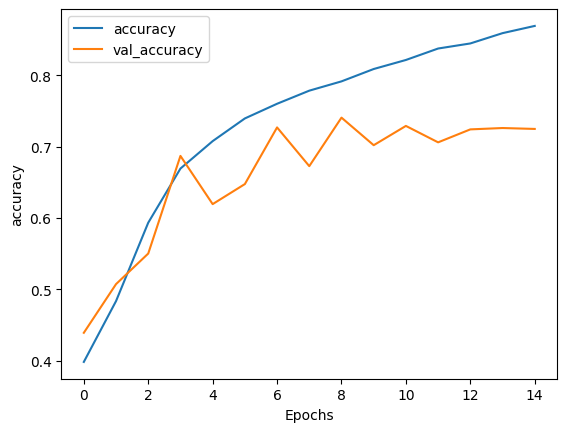

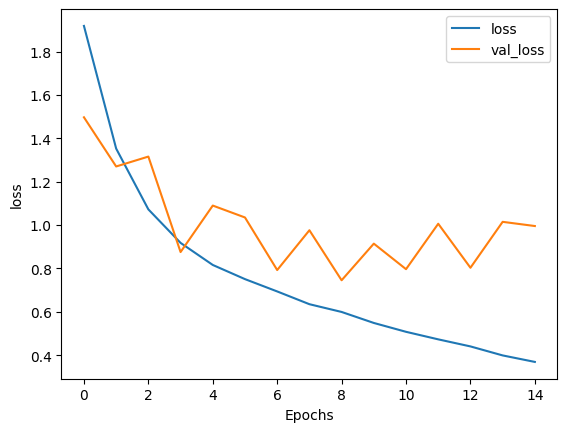

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
ethnicity_model.evaluate(X_test_ethnicity, y_test_ethnicity)

149/149 [==============================] - 0s 3ms/step - loss: 0.9830 - accuracy: 0.7262


[0.9829853177070618, 0.7262181043624878]

In [ ]:
# Save the model in HDF5 format (.h5)
ethnicity_model.save('ethnicity_model.h5')

# Download the saved model file
#files.download('ethnicity_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
